In [1]:
import os
os.environ["CALITP_BQ_MAX_BYTES"] = str(400_000_000_000)

from calitp.tables import tbl
from calitp import query_sql
import calitp.magics
import branca

import shared_utils
import utils

from siuba import *
import pandas as pd
import geopandas as gpd
import shapely

import datetime as dt

import rt_analysis as rt
import importlib

from tqdm import tqdm_notebook
from tqdm.notebook import trange, tqdm

/opt/conda/lib/python3.9/site-packages/geopandas/_compat.py:111: UserWarning: The Shapely GEOS version (3.10.2-CAPI-1.16.0) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(
E0315 22:54:03.955707461    1137 fork_posix.cc:70]           Fork support is only compatible with the epoll1 and poll polling strategies
E0315 22:54:10.321209302    1137 fork_posix.cc:70]           Fork support is only compatible with the epoll1 and poll polling strategies


In [2]:
analysis_date = dt.date(2022, 2, 8)

In [3]:
samtrans_itp_id = 290

In [4]:
importlib.reload(utils)
importlib.reload(rt)

<module 'rt_analysis' from '/home/jovyan/data-analyses/rt_delay/rt_analysis.py'>

In [5]:
pbar = tqdm()

0it [00:00, ?it/s]

In [6]:
sam = rt.OperatorDayAnalysis(samtrans_itp_id, analysis_date, pbar)

found parquet
found parquet
found parquet
found parquet
found_parquet
vehicle positions gdf must not be empty
vehicle positions gdf must not be empty
vehicle positions gdf must not be empty
vehicle positions gdf must not be empty
vehicle positions gdf must not be empty
vehicle positions gdf must not be empty
vehicle positions gdf must not be empty
vehicle positions gdf must not be empty
vehicle positions gdf must not be empty
vehicle positions gdf must not be empty
vehicle positions gdf must not be empty
vehicle positions gdf must not be empty
vehicle positions gdf must not be empty
vehicle positions gdf must not be empty
vehicle positions gdf must not be empty
vehicle positions gdf must not be empty
vehicle positions gdf must not be empty
vehicle positions gdf must not be empty
vehicle positions gdf must not be empty
vehicle positions gdf must not be empty
vehicle positions gdf must not be empty
vehicle positions gdf must not be empty
vehicle positions gdf must not be empty
vehicle po

/opt/conda/lib/python3.9/site-packages/siuba/sql/utils.py:52: SAWarning: Dialect bigquery:bigquery will not make use of SQL compilation caching as it does not set the 'supports_statement_cache' attribute to ``True``.  This can have significant performance implications including some performance degradations in comparison to prior SQLAlchemy versions.  Dialect maintainers should seek to set this attribute to True after appropriate development and testing for SQLAlchemy 1.4 caching support.   Alternatively, this attribute may be set to False which will disable this warning. (Background on this error at: https://sqlalche.me/e/14/cprf)


In [7]:
# (sam.stop_delay_view
#  >> group_by(_.stop_id, _.stop_name)
#  >> summarize(mean_delay = _.delay.mean(), max_delay = _.delay.max())
#  >> arrange(-_.mean_delay)) >> head(10)

In [8]:
sam.set_filter(start_time='15:00', end_time='19:00')

{'start_time': datetime.time(15, 0), 'end_time': datetime.time(19, 0), 'route_ids': None, 'direction_id': None, 'direction': None}


In [23]:
# m = sam.segment_speed_map()

In [24]:
# m

In [11]:
sam.pct_trips_valid_rt

0.5881133379405666

In [12]:
# sam.position_interpolators['11401903-137-Blocks-Weekday-14']['rt'].detailed_speed_map()

In [13]:
# sam.position_interpolators['11401833-137-Blocks-Weekday-14']['rt'].detailed_speed_map()

### What does shapes data look like?

* tough to work with directly
* currently converted to line geometries in shared utils, will soon be done in BigQuery

In [14]:
a_shape = tbl.gtfs_schedule.shapes() >> filter(_.calitp_itp_id == 290, _.shape_id == '3980273', _.calitp_url_number == 1) >> collect()
a_shape = a_shape.astype({'shape_pt_sequence': 'int64'})

In [15]:
a_shape >> arrange(_.shape_pt_sequence)

,calitp_itp_id,calitp_url_number,shape_id,shape_pt_lat,shape_pt_lon,shape_pt_sequence,shape_dist_traveled,calitp_extracted_at
669,290,1,3980273,37.795809,-122.396782,10001,None,2022-03-08
956,290,1,3980273,37.796021,-122.39683,10002,None,2022-03-08
655,290,1,3980273,37.79637,-122.396875,10003,None,2022-03-08
562,290,1,3980273,37.796382,-122.396806,10004,None,2022-03-08
570,290,1,3980273,37.796363,-122.396726,10005,None,2022-03-08
...,...,...,...,...,...,...,...,...
1357,290,1,3980273,37.486169,-122.232721,430022,None,2022-03-08
1044,290,1,3980273,37.486174,-122.232718,430023,None,2022-03-08
616,290,1,3980273,37.486182,-122.232633,430024,None,2022-03-08
771,290,1,3980273,37.486173,-122.232593,430025,None,2022-03-08


In [16]:
ex = sam.position_interpolators['11454049-137-Blocks-Weekday-14']['rt']

In [17]:
## result of shared_utils.geography_utils.make_routes_shapefile
ex.shape.wkt[:100]

'LINESTRING (-210744.37200495336 -21854.591054198798, -210747.995915223 -21830.924521209672, -210750.'

In [20]:
# ex.detailed_speed_map()

In [18]:
import folium

In [94]:
# utils.layer_points(ex)

In [83]:
ex._position_cleaning_count

12

In [21]:
ex._shift_calculate(ex.debug_dict['clean_11']) >> head(3)

,header_timestamp,vehicle_timestamp,vehicle_longitude,vehicle_latitude,geometry,shape_meters,secs_from_last,meters_from_last,progressed,speed_from_last
78126,2022-02-08 12:22:41,2022-02-08 12:22:11,-122.40980,37.630985,POINT (-212354.446 -40142.555),25443.153727,NaN,NaN,False,NaN
78061,2022-02-08 12:35:57,2022-02-08 12:35:43,-122.41246,37.630410,POINT (-212590.425 -40200.493),25199.604548,812.0,-243.549179,False,-0.299937
78107,2022-02-08 12:36:37,2022-02-08 12:36:12,-122.40877,37.630875,POINT (-212264.012 -40157.086),25533.356591,29.0,333.752043,True,11.508691


In [22]:
ex._shift_calculate(ex.debug_dict['clean_1']) >> head(3)

,header_timestamp,vehicle_timestamp,vehicle_longitude,vehicle_latitude,geometry,shape_meters,secs_from_last,meters_from_last,progressed,speed_from_last
78134,2022-02-08 12:02:55,2022-02-08 12:02:31,-122.406920,37.782290,POINT (-211673.745 -23334.388),2394.138605,NaN,NaN,False,NaN
78001,2022-02-08 12:03:55,2022-02-08 12:03:40,-122.408394,37.781110,POINT (-211806.678 -23462.231),2578.537122,69.0,184.398518,True,2.672442
78121,2022-02-08 12:04:55,2022-02-08 12:04:40,-122.411260,37.778854,POINT (-212065.052 -23706.535),2934.174313,60.0,355.637191,True,5.927287


### Complex Shape Geometries

In [23]:
ex.shape.geom_type

'LineString'

In [24]:
geo = ex.shape

In [52]:
ex.shape_id

'SamTrans80:3980273'

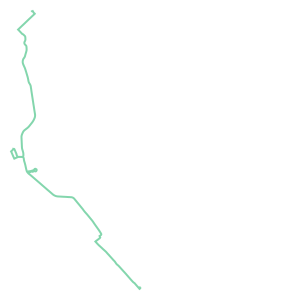

In [26]:
geo

In [25]:
geo.is_simple

False

In [27]:
import numpy as np

In [28]:
def show_simple_complex(linestring):
    full_len = linestring.length
    step = 0.1
    splits = []
    for split in np.arange(0, 1, step):
        if split > 1:
            split = 1
        split_st = full_len * split
        split_end = full_len * (split+step)
        # pre_split = shapely.ops.substring(geo, 0, split_st)
        split = shapely.ops.substring(geo, split_st, split_end)
        splits += [[split_st, split_end, split.is_simple, split]]
    return splits

In [29]:
pd.DataFrame(show_simple_complex(geo), columns=['segment_st', 'segment_end', 'simple', 'geometry'])

,segment_st,segment_end,simple,geometry
0,0.000000,5333.389503,True,LINESTRING (-210744.37200495336 -21854.5910541...
1,5333.389503,10666.779007,True,LINESTRING (-211610.0829775423 -25525.99831557...
2,10666.779007,16000.168510,True,LINESTRING (-211185.93999520756 -30542.8929989...
3,16000.168510,21333.558013,True,LINESTRING (-210637.70296056085 -35705.9496097...
4,21333.558013,26666.947517,False,LINESTRING (-212168.35532007198 -40160.3321727...
5,26666.947517,32000.337020,False,LINESTRING (-211667.58120282902 -40849.2768631...
6,32000.337020,37333.726523,True,LINESTRING (-210391.18730405127 -42911.4045541...
7,37333.726523,42667.116026,True,LINESTRING (-205856.52591217656 -45237.8557611...
8,42667.116026,48000.505530,True,LINESTRING (-202420.18081819676 -49219.6257218...
9,48000.505530,53333.895033,True,LINESTRING (-200516.9016863283 -53111.69817393...


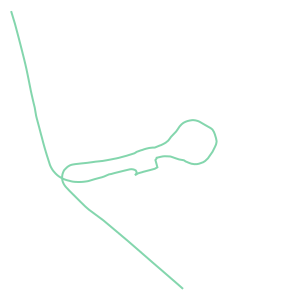

In [30]:
show_simple_complex(geo)[5][3]

In [84]:
gdf = gpd.GeoDataFrame({'shape': [ex.shape_id], 'geometry': [geo]}, crs = shared_utils.geography_utils.CA_NAD83Albers)

In [85]:
utils.map_line(gdf)

In [35]:
# [(x, sam.position_interpolators[x]['rt'].shape.is_simple) for x in sam.position_interpolators.keys()]

## stats for non-progressing positions

In [48]:
sam_non_progress_series = [sam.position_interpolators[key]['rt'].position_gdf >> filter(-_.progressed) >> select(_.meters_from_last) for key in sam.position_interpolators.keys()]

In [49]:
all_np = pd.Series()
for np in sam_non_progress_series:
    all_np = pd.concat((all_np, np))

/tmp/ipykernel_931/3533518072.py:1: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.


In [50]:
all_np.meters_from_last.median()

0.0

In [51]:
all_np = all_np.apply(lambda x: abs(x)) >> filter(_.meters_from_last > 0)

In [52]:
all_np.meters_from_last.quantile(.5)

4.342589361126329

In [53]:
all_np.meters_from_last.quantile(.8)

282.2121205743536

In [54]:
all_np.meters_from_last.mean()

459.9110923020999

In [55]:
all_np.meters_from_last.value_counts()

1.590134       19
2.572077       14
2.476809       14
1.361410       13
1.361400       12
               ..
1507.247856     1
117.363291      1
2073.437137     1
1.063098        1
45.529849       1
Name: meters_from_last, Length: 3310, dtype: int64

In [56]:
all_np

,0,meters_from_last
33,NaN,3.360355
50,NaN,530.313233
51,NaN,176.720918
85,NaN,210.383566
93,NaN,1.305119
...,...,...
76,NaN,13735.566598
12,NaN,469.219307
13,NaN,2.600646
2,NaN,190.309337


In [93]:
pd.DataFrame([categorize_cleaning(sam, key) for key in sam.position_interpolators.keys()], columns=['trip_id',
                                                                                                    'percent of initial points after cleaning',
                                                                                                   'percent of location-deduplicated initial points'])

,trip_id,percent of initial points after cleaning,percent of location-deduplicated initial points
0,11403326-137-Blocks-Weekday-14,0.829060,0.941748
1,11427096-137-Blocks-Weekday-14,0.080201,0.800000
2,11403562-137-Blocks-Weekday-14,0.333333,0.769231
3,11403225-137-Blocks-Weekday-14,0.098237,0.829787
4,11427080-137-Blocks-Weekday-14,0.080247,0.722222
...,...,...,...
848,11403306-137-Blocks-Weekday-14,0.207792,0.444444
849,11401821-137-Blocks-Weekday-14,0.484848,0.941176
850,11402654-137-Blocks-Weekday-14,0.523810,0.970588
851,11463607-137-Blocks-Weekday-14,0.733333,0.846154


In [64]:
sam.rt_trips >> filter(_.route_id == '398', _.direction_id == '0')

,calitp_itp_id,calitp_url_number,service_date,trip_key,trip_id,route_id,direction_id,shape_id,calitp_extracted_at,calitp_deleted_at,median_time,direction,mean_speed_mph
154,290,1,2022-02-08,-5436864444649761470,11454053-137-Blocks-Weekday-14,398,0,SamTrans80:3980273,2022-01-31,2099-01-01,20:42:50.500000,Southbound,23.841306
1016,290,1,2022-02-08,-7193195425898549160,11454049-137-Blocks-Weekday-14,398,0,SamTrans80:3980273,2022-01-31,2099-01-01,12:43:11,Southbound,18.713125


In [62]:
ex.direction_id

'0'

In [65]:
ex.trip_id

'11454049-137-Blocks-Weekday-14'

### More data helps

In [87]:
# sam.position_interpolators['11454053-137-Blocks-Weekday-14']['rt'].detailed_speed_map()

In [96]:
# utils.layer_points(sam.position_interpolators['11454053-137-Blocks-Weekday-14']['rt'])

### This cleaning step can be smooth, for example it only ran once for this trip

In [89]:
ex2 = sam.position_interpolators['11403326-137-Blocks-Weekday-14']['rt']

In [97]:
# utils.layer_points(ex2)

In [98]:
# gdf = gpd.GeoDataFrame({'shape': [ex2.shape_id], 'geometry': [ex2.shape]}, crs = shared_utils.geography_utils.CA_NAD83Albers)

# utils.map_line(gdf)

In [93]:
# ex2.detailed_speed_map()

## What about some other operators?

In [65]:
sbmtd = rt.OperatorDayAnalysis(293, analysis_date, pbar)

found parquet
found parquet
found parquet
found parquet
found_parquet
vehicle positions gdf must not be empty
less than 1km of data
less than 1km of data
less than 1km of data
less than 1km of data
less than 1km of data
less than 1km of data
less than 1km of data
less than 1km of data
less than 1km of data
vehicle positions gdf must not be empty
less than 1km of data
less than 1km of data
less than 1km of data
less than 1km of data
less than 1km of data
less than 1km of data
less than 1km of data
less than 1km of data
less than 1km of data
less than 1km of data
vehicle positions gdf must not be empty
less than 1km of data
vehicle positions gdf must not be empty
less than 1km of data
less than 1km of data
less than 1km of data
less than 1km of data
less than 1km of data


In [69]:
sbmtd.rt_trips >> filter(_.shape_id == 'shp-6-04')

,calitp_itp_id,calitp_url_number,service_date,trip_key,trip_id,route_id,direction_id,shape_id,calitp_extracted_at,calitp_deleted_at,median_time,direction,mean_speed_mph
2,293,0,2022-02-08,4454682800876067958,800841030,6,1,shp-6-04,2021-12-18,2022-02-10,15:38:14,Westbound,11.470326
115,293,0,2022-02-08,-4557418924535906903,800847030,6,1,shp-6-04,2021-12-18,2022-02-10,12:36:38,Westbound,13.426449
164,293,0,2022-02-08,885801156839346046,800849030,6,1,shp-6-04,2021-12-18,2022-02-10,11:40:37.500000,Westbound,12.517786
177,293,0,2022-02-08,811895267587567791,800834030,6,1,shp-6-04,2021-12-18,2022-02-10,17:52:19,Westbound,12.342392
342,293,0,2022-02-08,2724814575258198476,800832030,6,1,shp-6-04,2021-12-18,2022-02-10,18:15:44,Westbound,8.571812
365,293,0,2022-02-08,3865504044402145696,800845030,6,1,shp-6-04,2021-12-18,2022-02-10,13:41:04,Westbound,12.183714
452,293,0,2022-02-08,818247832631865311,800840030,6,1,shp-6-04,2021-12-18,2022-02-10,15:55:26,Westbound,12.882781
536,293,0,2022-02-08,4328912869561063653,800853030,6,1,shp-6-04,2021-12-18,2022-02-10,09:39:49,Westbound,13.273122
572,293,0,2022-02-08,6720165131830200643,800837030,6,1,shp-6-04,2021-12-18,2022-02-10,16:58:07,Westbound,13.861656
834,293,0,2022-02-08,8296401396791920085,800858030,6,1,shp-6-04,2021-12-18,2022-02-10,07:37:01,Westbound,13.140462


In [74]:
sb_trip = sbmtd.position_interpolators['800834030']['rt']

In [99]:
# sb_trip.detailed_speed_map()

In [100]:
# gdf = gpd.GeoDataFrame({'shape': [sb_trip.shape_id], 'geometry': [sb_trip.shape]}, crs = shared_utils.geography_utils.CA_NAD83Albers)
# utils.map_line(gdf)

In [101]:
# utils.layer_points(sb_trip)